In [2]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np
import difflib
%matplotlib inline

In [3]:
def swc_to_dataframe( file_name ) :
    col_names = ['id', 'type', 'x', 'y', 'z', 'radius', 'parent', 'seg_id', 'level', 'mode', 'timestamp', 'TFresindex']
    df = pd.read_csv( file_name, sep=r"\s+", comment = "#", names = col_names, index_col = 'id')
    return df

In [4]:
def filter_swc( df, type ) :
    dd = df[df['type']==type]
    return dd

In [5]:
def file_diff( file1, file2 ) :
    
    with open(file1) as f1:
        f1_text = f1.read()
    with open(file2) as f2:
        f2_text = f2.read()
        
    # Find and print the diff:
    count = 0;
    for line in difflib.unified_diff(f1_text, f2_text, fromfile=file1, tofile=file2, lineterm=''):
        
        print(line)
        count += 1
        
        if count > 15 :
            break
    

In [6]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)

In [9]:
#model_directory = "/allen/programs/celltypes/workgroups/mousecelltypes/_UPENN_fMOST"
model_directory = "C:/Users/lydia/OneDrive/Work/DigitalAssets/_UPENN_fMOST"

# Registered SWC files directly from HUST vs from the code
reference_directory = os.path.join( model_directory,"HUSTReproduction_9_7_2021","TransformedByHUST","182709_RegisteredByHUST","182709_RegisteredByHUST")
input_directory = os.path.join( model_directory,"HUSTReproduction_9_7_2021","Sandbox","182709_ByHUST_original_sent_in_micron_registered")

# SWC files directly sent to HUST
#reference_directory = os.path.join( model_directory,"HUSTReproduction_9_7_2021","Original","182709_ByHUST_original_sent")
#input_directory = os.path.join( model_directory,"HUSTReproduction_9_7_2021","Original","182709_newCells")


In [10]:
allr = pd.DataFrame()
alli = pd.DataFrame()

for rfile in glob.glob(os.path.join(reference_directory, "*.swc")):
#for rfile in [os.path.join(reference_directory,'182709_1392-X9267-Y12144_reg.swc')] :
#for rfile in [os.path.join(reference_directory,'182709_1565-X10730-Y13868_reg.swc')] :
#for rfile in [os.path.join(reference_directory,'182709_2078-X10276-Y14982_reg.swc')] :    
#for rfile in [os.path.join(reference_directory,'182709_8205-X11007-Y9343_reg.swc')] :
    
    print(rfile)
    
    bb = os.path.basename( rfile )
    ifile = os.path.join(input_directory, bb)
    
    rdf = swc_to_dataframe( rfile )
    idf = swc_to_dataframe( ifile )
    
    allr = pd.concat([allr,rdf], ignore_index=True)
    alli = pd.concat([alli,idf], ignore_index=True)
    

C:/Users/lydia/OneDrive/Work/DigitalAssets/_UPENN_fMOST\HUSTReproduction_9_7_2021\TransformedByHUST\182709_RegisteredByHUST\182709_RegisteredByHUST\182709_1392-X9267-Y12144_reg.swc
C:/Users/lydia/OneDrive/Work/DigitalAssets/_UPENN_fMOST\HUSTReproduction_9_7_2021\TransformedByHUST\182709_RegisteredByHUST\182709_RegisteredByHUST\182709_1565-X10730-Y13868_reg.swc
C:/Users/lydia/OneDrive/Work/DigitalAssets/_UPENN_fMOST\HUSTReproduction_9_7_2021\TransformedByHUST\182709_RegisteredByHUST\182709_RegisteredByHUST\182709_1907-X12545-Y15265_reg.swc
C:/Users/lydia/OneDrive/Work/DigitalAssets/_UPENN_fMOST\HUSTReproduction_9_7_2021\TransformedByHUST\182709_RegisteredByHUST\182709_RegisteredByHUST\182709_2078-X10276-Y14982_reg.swc
C:/Users/lydia/OneDrive/Work/DigitalAssets/_UPENN_fMOST\HUSTReproduction_9_7_2021\TransformedByHUST\182709_RegisteredByHUST\182709_RegisteredByHUST\182709_405-X9581-Y19368_reg.swc
C:/Users/lydia/OneDrive/Work/DigitalAssets/_UPENN_fMOST\HUSTReproduction_9_7_2021\Transformed

In [11]:
allr

,type,x,y,z,radius,parent,seg_id,level,mode,timestamp,TFresindex
0,1.0,4488.849424,3901.403945,1699.819748,0.000,-1.0,NaN,NaN,NaN,NaN,NaN
1,1.0,4481.876972,3896.083606,1699.305296,0.618,594109.0,NaN,NaN,NaN,NaN,NaN
2,3.0,4481.226375,3896.219144,1703.371289,0.618,622975.0,NaN,NaN,NaN,NaN,NaN
3,3.0,4480.685492,3895.578259,1702.334413,0.618,622976.0,NaN,NaN,NaN,NaN,NaN
4,3.0,4479.569462,3894.832121,1704.266638,0.618,622977.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17667,0.0,4967.433224,9096.891098,8970.668919,10.000,-1.0,NaN,NaN,NaN,NaN,NaN
17668,0.0,5789.480078,9031.581527,9366.912903,10.000,-1.0,NaN,NaN,NaN,NaN,NaN
17669,0.0,5456.886053,8786.205089,6760.866143,10.000,-1.0,NaN,NaN,NaN,NaN,NaN
17670,0.0,7242.386194,9632.040707,7609.649849,10.000,-1.0,NaN,NaN,NaN,NaN,NaN


In [12]:
alli

,type,x,y,z,radius,parent,seg_id,level,mode,timestamp,TFresindex
0,1.0,4476.847087,3907.031186,1694.888903,0.000,-1.0,NaN,NaN,NaN,NaN,NaN
1,1.0,4469.767636,3902.021279,1694.579591,0.618,594109.0,NaN,NaN,NaN,NaN,NaN
2,3.0,4469.157281,3902.334765,1698.954142,0.618,622975.0,NaN,NaN,NaN,NaN,NaN
3,3.0,4468.593192,3901.679525,1697.865064,0.618,622976.0,NaN,NaN,NaN,NaN,NaN
4,3.0,4467.477439,3901.051077,1699.977250,0.618,622977.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17667,0.0,4888.607071,9117.293535,8956.851140,10.000,-1.0,NaN,NaN,NaN,NaN,NaN
17668,0.0,5708.011421,9072.922666,9376.353140,10.000,-1.0,NaN,NaN,NaN,NaN,NaN
17669,0.0,5489.039762,8868.749463,6695.508005,10.000,-1.0,NaN,NaN,NaN,NaN,NaN
17670,0.0,7234.678408,9665.365311,7651.289912,10.000,-1.0,NaN,NaN,NaN,NaN,NaN


(16.537535661875154, 0.9997183346829728)

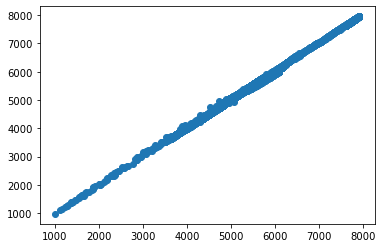

In [13]:
plt.plot(allr['x'],alli['x'],'o')
estimate_coef(allr['x'],alli['x'])

(-51.048507424119634, 1.0073619964199982)

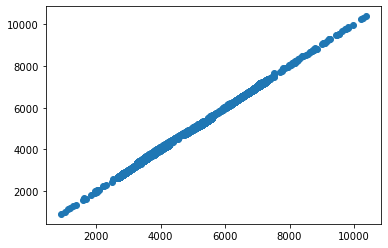

In [14]:
plt.plot(allr['y'],alli['y'],'o')
estimate_coef(allr['y'],alli['y'])

(-4.716481321881474, 0.9984923075092897)

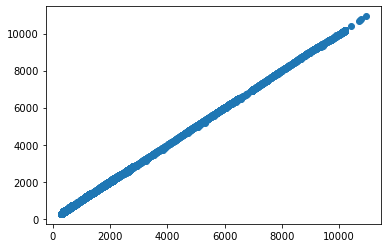

In [15]:
plt.plot(allr['z'],alli['z'],'o')
estimate_coef(allr['z'],alli['z'])

In [16]:
np.max(allr['x']-alli['x'])

114.1707009999991

In [17]:
np.max(allr['y']-alli['y'])

90.6337169999997

In [18]:
np.max(allr['z']-alli['z'])

117.44862699999976

In [19]:
np.min(allr['x']-alli['x'])

-218.63234100000045

In [20]:
np.min(allr['y']-alli['y'])

-148.61240999999973

In [21]:
np.min(allr['z']-alli['z'])

-57.47645599999987

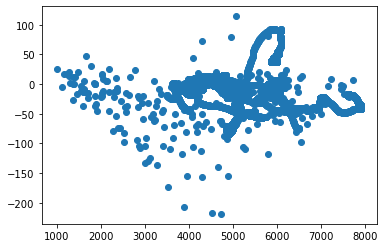

In [23]:
plt.plot(allr['x'],allr['x']-alli['x'],'o')

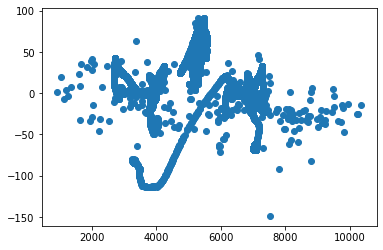

In [24]:
plt.plot(allr['y'],allr['y']-alli['y'],'o')

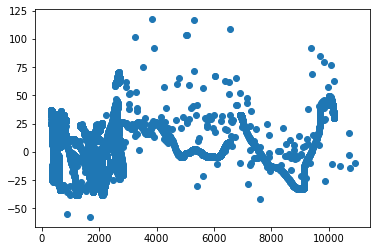

In [25]:
plt.plot(allr['z'],allr['z']-alli['z'],'o')